In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [47]:
path = 'C:\\Users\\Eliza Marie\\Anaconda\\fish or not'
#C:\Users\Eliza Marie\Anaconda\train_folder
train_datagen = ImageDataGenerator(rescale=1. / 255)
#change to categorical
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 476 images belonging to 2 classes.


In [48]:
type(train)

keras.preprocessing.image.DirectoryIterator

In [50]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [51]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 2)
Image Size of first image :  (227, 227, 3)
Output of first image :  (2,)


Text(0.5, 1.0, '[1. 0.]')

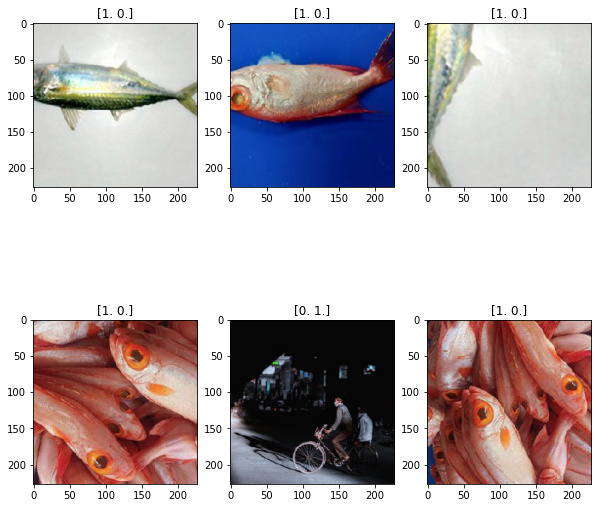

In [52]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [53]:
#1
def AlexNet(input_shape):
    X_input = Input(input_shape)

    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(2,activation='softmax',name = 'fc2')(X)
    
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [126]:
def AlexNet(train, input_shape):
    X_input = Input(input_shape)
    
    dense_layers =[0]
    layer_sizes=[64]
    conv_layers =[3]
    
    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:
                NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
                tensorboard = TensorBoard(log_dir='logs2/{}'.format(NAME))
                print(NAME)
                
                X = Sequential()

                X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
                X = BatchNormalization(axis = 3 , name = "bn0")(X)
                X = Activation('relu')(X)
    
                X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)

                X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
                X = BatchNormalization(axis = 3 ,name='bn1')(X)
                X = Activation('relu')(X)
    
                X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)

                X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
                X = BatchNormalization(axis = 3, name = 'bn2')(X)
                X = Activation('relu')(X)

                X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
                X = BatchNormalization(axis = 3, name = 'bn3')(X)
                X = Activation('relu')(X)

                X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
                X = BatchNormalization(axis = 3, name = 'bn4')(X)
                X = Activation('relu')(X)

                X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)

                X = Flatten()(X)

                X = Dense(4096, activation = 'relu', name = "fc0")(X)

                X = Dense(4096, activation = 'relu', name = 'fc1')(X) 

                X = Dense(2,activation='softmax',name = 'fc2')(X)
                
                #X.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])
                #X.fit(train,epochs=5, batch_size = 64, callbacks =[tensorboard])
                
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [127]:
#2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
alex = AlexNet(train, train[0][0].shape[1:])

3-conv-64-nodes-0-dense-1675148729


In [128]:
#3
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation_75 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [129]:
#4
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [137]:
#C:\Users\Eliza Marie\Anaconda\val_folder2
path_test = 'C:\\Users\\Eliza Marie\\Anaconda\\val_folder2'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 158 images belonging to 2 classes.


In [138]:
alex.fit(train,epochs=5, batch_size = 64,
        validation_data=test,
        validation_freq=1)

Epoch 1/5
15/15 [==============================] - 50s 3s/step - loss: 0.3008 - accuracy: 0.8824 - val_loss: 1.1872 - val_accuracy: 0.4684
Epoch 2/5
15/15 [==============================] - 45s 3s/step - loss: 0.2030 - accuracy: 0.9328 - val_loss: 1.4577 - val_accuracy: 0.6392
Epoch 3/5
15/15 [==============================] - 44s 3s/step - loss: 0.1677 - accuracy: 0.9349 - val_loss: 2.7289 - val_accuracy: 0.5823
Epoch 4/5
15/15 [==============================] - 45s 3s/step - loss: 0.1608 - accuracy: 0.9433 - val_loss: 1.5039 - val_accuracy: 0.6329
Epoch 5/5
15/15 [==============================] - 45s 3s/step - loss: 0.1240 - accuracy: 0.9580 - val_loss: 0.7855 - val_accuracy: 0.7405


In [139]:
#7
alex.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

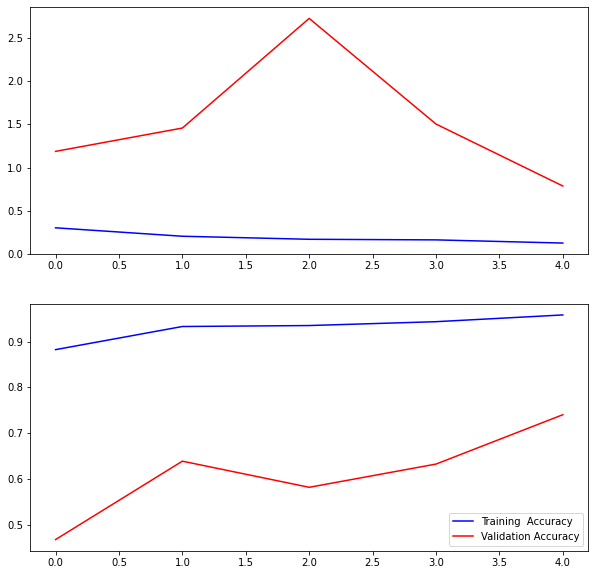

In [140]:
#7
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(alex.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(alex.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(alex.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(alex.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [143]:
print('Accuracy Score = ',np.max(alex.history.history['val_accuracy']))

Accuracy Score =  0.7405063509941101


In [147]:
#5
os.mkdir('./logs1')
os.mkdir('./logs1/fit')

In [149]:
#6
import datetime
log_dir="./logs1/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callback_list = [tensorboard_callback]

# start training
alex.fit(train,epochs=5, batch_size = 64,
        validation_data=test,
        validation_freq=1)
alex.summary()

# save the whole model
#model.save(model_dir)
#python -m tensorboard.main --logdir=logs/

Epoch 1/5
15/15 [==============================] - 70s 4s/step - loss: 0.2119 - accuracy: 0.9286 - val_loss: 3.7287 - val_accuracy: 0.5759
Epoch 2/5
15/15 [==============================] - 44s 3s/step - loss: 0.1368 - accuracy: 0.9580 - val_loss: 1.7947 - val_accuracy: 0.4620
Epoch 3/5
15/15 [==============================] - 45s 3s/step - loss: 0.1267 - accuracy: 0.9664 - val_loss: 2.4977 - val_accuracy: 0.5570
Epoch 4/5
15/15 [==============================] - 45s 3s/step - loss: 0.1417 - accuracy: 0.9580 - val_loss: 1.9024 - val_accuracy: 0.5316
Epoch 5/5
15/15 [==============================] - 46s 3s/step - loss: 0.1237 - accuracy: 0.9496 - val_loss: 1.1737 - val_accuracy: 0.6835
Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)         

In [136]:
preds = alex.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

C:\Users\ELIZAM~1\AppData\Local\Temp/ipykernel_5592/4132273033.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  preds = alex.evaluate_generator(test)


Loss = 0.8592482209205627
Test Accuracy = 0.7341772317886353


In [93]:
path_test = 'C:\\Users\\Eliza Marie\\Anaconda\\test_folder2'
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 158 images belonging to 1 classes.


In [94]:
predictions = alex.predict_generator(predict)

C:\Users\ELIZAM~1\AppData\Local\Temp/ipykernel_5592/3270750516.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = alex.predict_generator(predict)


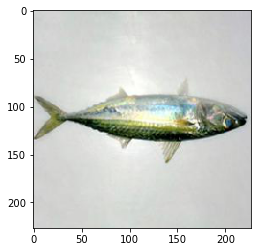

In [95]:
imshow(predict[100][0][0])

In [97]:
values = predictions[100]
#print(predictions[70])
floats = [float(x) for x in values]
print(floats)

[0.99055415391922, 0.009445850737392902]


In [98]:
import os 
def get_category(predicted_output):
    path ="C:\\Users\\Eliza Marie\\Anaconda\\fish or not"
    return os.listdir(path)[np.argmax(predicted_output)]

In [99]:
print(get_category(predictions[100]))

fish


Text(0.5, 1.0, 'fish')

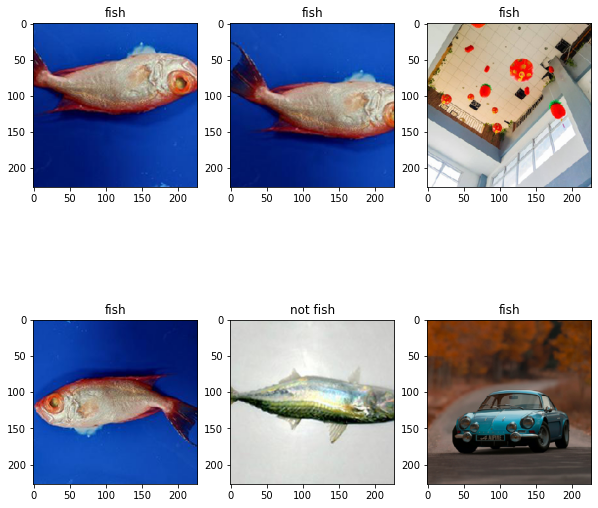

In [100]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(predict[10][0][0])
axs[0][0].set_title(get_category(predictions[10]))

axs[0][1].imshow(predict[20][0][0])
axs[0][1].set_title(get_category(predictions[20]))

axs[0][2].imshow(predict[30][0][0])
axs[0][2].set_title(get_category(predictions[30]))

axs[1][0].imshow(predict[40][0][0])
axs[1][0].set_title(get_category(predictions[40]))

axs[1][1].imshow(predict[50][0][0])
axs[1][1].set_title(get_category(predictions[50]))

axs[1][2].imshow(predict[153][0][0])
axs[1][2].set_title(get_category(predictions[60]))